In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#list(pd.read_csv("region2013.csv", sep=";").columns.values)

In [4]:
dfUS13=pd.read_csv("C2013.csv", sep=";")
dfUS14=pd.read_csv("C2014.csv", sep=";")
dfNY13=pd.read_csv("NY2013.csv", sep=";")
dfNY14=pd.read_csv("NY2014.csv", sep=";")
dfTx13=pd.read_csv("texas2013.csv", sep=";")
dfTx14=pd.read_csv("Texas2014.csv", sep=";")
dfRel13=pd.read_csv("Rel2013.csv", sep=";")
dfRel14=pd.read_csv("Rel2014.csv", sep=";")
dfregion13=pd.read_csv("region2013.csv", sep=";")

In [5]:
del dfUS13['Unnamed: 20']
del dfUS13[' ']
del dfUS13[ 'Unnamed: 22']
del dfUS13[ 'Unnamed: 23']


In [58]:
dfTx14

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Rape
0,Abernathy,2 801,6,0,0,3,36,15,19,2,0,3
1,Abilene,120 686,571,7,128,343,5 344,1 095,3 887,362,28,93
2,Addison,16 061,67,0,15,44,686,83,541,62,2,8
3,Alamo,19 054,145,1,13,125,1 244,160,992,92,2,6
4,Alamo Heights,7 673,5,0,1,3,257,44,210,3,1,1
5,Alice,19 689,143,1,6,128,1 029,245,740,44,11,8
6,Allen,93 889,73,0,19,31,1 128,151,915,62,3,23
7,Alpine,6 058,7,1,0,6,49,20,27,2,2,0
8,Alton,15 311,10,0,4,5,253,45,186,22,1,1
9,Alvarado,3 821,18,0,3,10,95,16,73,6,0,5


In [6]:
dfUS13 = dfUS13.dropna()
dfUS13 = dfUS13.reset_index(drop=True)
kolumny13 =dfUS13.columns.values

#konwertuję zawartości komórek na liczby, by móc na nich dalej pracować

for col in kolumny13:
    for i in range(len(dfUS13)):
        if type(dfUS13.loc[i, col]) is str:
            dfUS13.loc[i, col] = dfUS13.loc[i, col].replace(" ", "").replace(",", ".")
        dfUS13.loc[i, col] = float(dfUS13.loc[i, col])
        
    dfUS13[[col]] = dfUS13[[col]].astype(float)

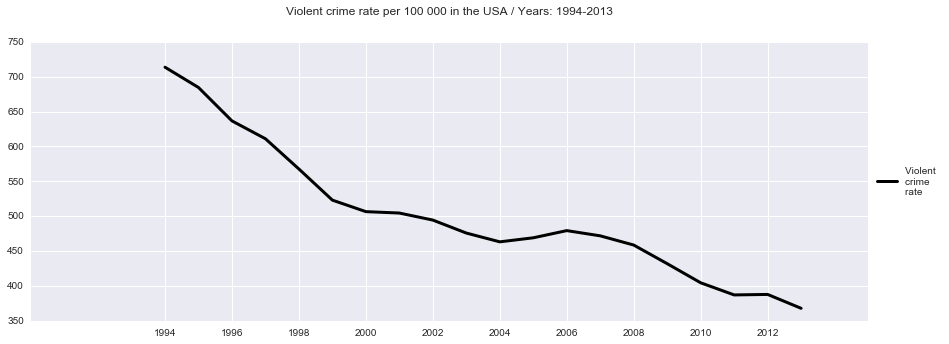

In [7]:
plt.figure(figsize=(15,5))
plt.plot(dfUS13['Year'], dfUS13['Violent \ncrime \nrate '], color = 'black', linewidth = 3)
plt.xticks(np.arange(min(dfUS13['Year']), max(dfUS13['Year'])+1, 2.0))
plt.title('Violent crime rate per 100 000 in the USA / Years: 1994-2013', y=1.08)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

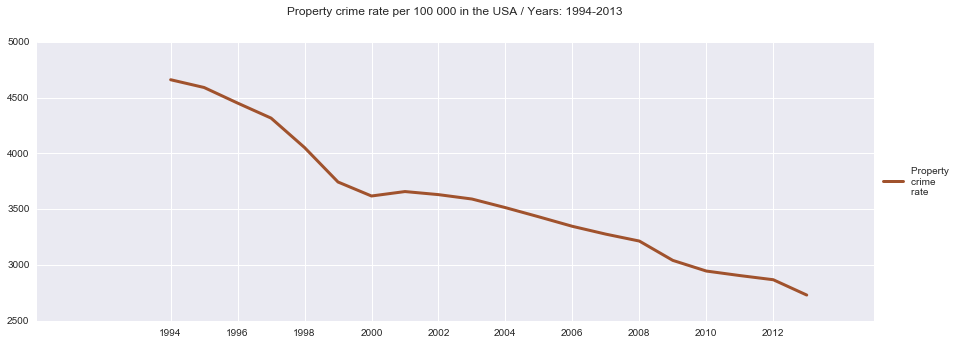

In [8]:
plt.figure(figsize=(15,5))
plt.plot(dfUS13['Year'], dfUS13['Property \ncrime \nrate '], color='sienna', linewidth = 3)
plt.xticks(np.arange(min(dfUS13['Year']), max(dfUS13['Year'])+1, 2.0))
plt.title('Property crime rate per 100 000 in the USA / Years: 1994-2013', y=1.08)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

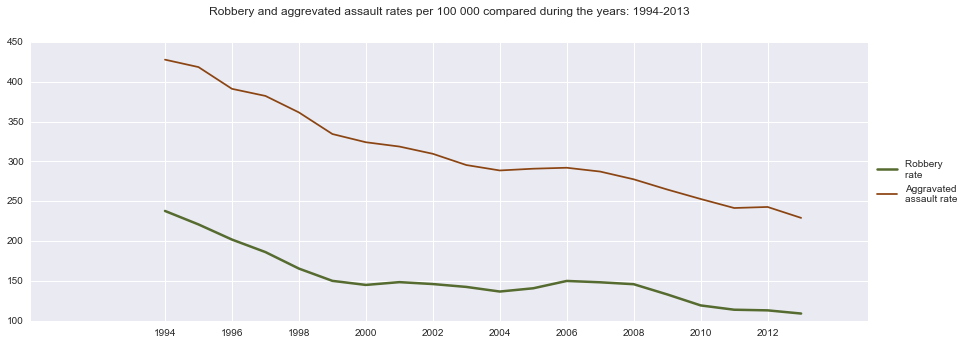

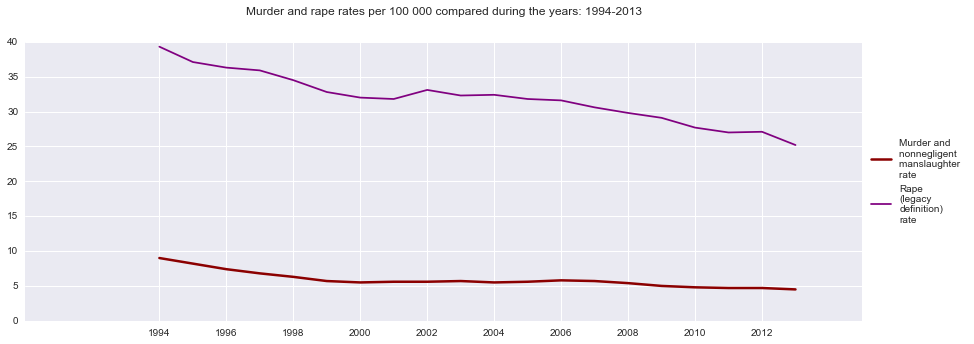

In [9]:

plt.figure(figsize=(15,5))

plt.plot(dfUS13['Year'], dfUS13['Robbery \nrate '], color = 'darkolivegreen', linewidth = 2.5)
plt.plot(dfUS13['Year'], dfUS13['Aggravated \nassault rate '], color = 'saddlebrown')
plt.xticks(np.arange(min(dfUS13['Year']), max(dfUS13['Year'])+1, 2.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Robbery and aggrevated assault rates per 100 000 compared during the years: 1994-2013", y=1.08)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(dfUS13['Year'], dfUS13['Murder and \nnonnegligent \nmanslaughter \nrate '], color = 'darkred', linewidth = 2.5)
plt.plot(dfUS13['Year'], dfUS13['Rape\n(legacy\ndefinition)\nrate'], color = 'purple')
plt.xticks(np.arange(min(dfUS13['Year']), max(dfUS13['Year'])+1, 2.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Murder and rape rates per 100 000 compared during the years: 1994-2013", y=1.08)
plt.show()



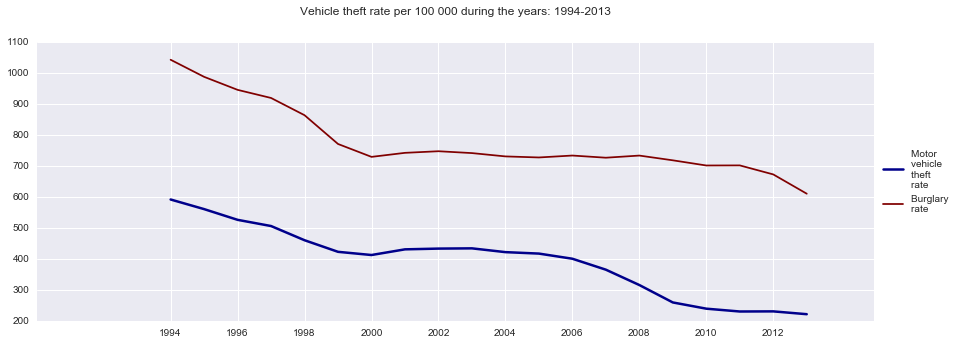

In [10]:
plt.figure(figsize=(15,5))
plt.plot(dfUS13['Year'], dfUS13['Motor \nvehicle \ntheft \nrate '], color = 'darkblue', linewidth = 2.5)
plt.plot(dfUS13['Year'], dfUS13['Burglary \nrate '], color = 'maroon')
plt.xticks(np.arange(min(dfUS13['Year']), max(dfUS13['Year'])+1, 2.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title( 'Vehicle theft rate per 100 000 during the years: 1994-2013', y=1.08)

plt.show()

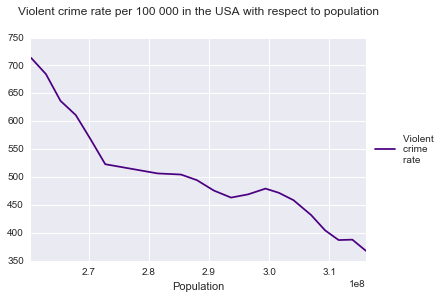

In [11]:
dfUS13.plot(x='Population', y='Violent \ncrime \nrate ', color='indigo')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title( 'Violent crime rate per 100 000 in the USA with respect to population', y=1.08)
plt.show()

In [12]:
rokk = dfUS13.loc[19,:]

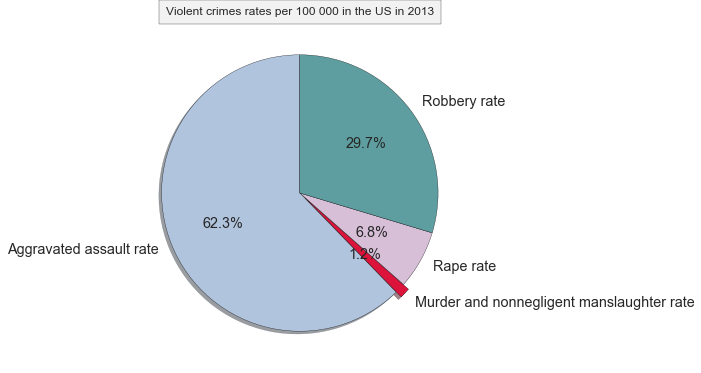

In [13]:
from pylab import *
from matplotlib import font_manager as fm


figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])


labels = 'Aggravated assault rate', 'Murder and nonnegligent manslaughter rate', 'Rape rate', 'Robbery rate'
fracs = [rokk[11]/rokk[3], rokk[5]/rokk[3], rokk[7]/rokk[3], rokk[9]/rokk[3]]
colors = ['lightsteelblue', 'crimson', 'thistle', 'cadetblue']
explode=(0, 0.05, 0, 0)

patches, texts, autotexts = ax.pie(fracs, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)

title('Violent crimes rates per 100 000 in the US in 2013', bbox={'facecolor':'0.95', 'pad':7})


proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()



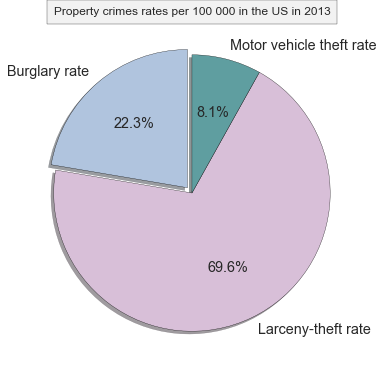

In [14]:

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])


labels = 'Burglary rate', 'Larceny-theft rate', 'Motor vehicle theft rate'
fracs = [rokk[15]/rokk[13], rokk[17]/rokk[13], rokk[19]/rokk[13]]
colors = ['lightsteelblue', 'thistle', 'cadetblue']
explode=(0.05, 0, 0)

patches, texts, autotexts = ax.pie(fracs, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)

title('Property crimes rates per 100 000 in the US in 2013', bbox={'facecolor':'0.95', 'pad':7})


proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()



In [15]:
dfNY14 = dfNY14.dropna()
dfNY14 = dfNY14.reset_index(drop=True)
dfNY14.columns.values

kolumny = dfNY14.columns.values[1:]

for col in kolumny:
    for i in range(len(dfNY14)):
        if type(dfNY14.loc[i, col]) is str:
            dfNY14.loc[i, col] = dfNY14.loc[i, col].replace(" ", "")
        dfNY14.loc[i, col] = int(dfNY14.loc[i, col])
        
    dfNY14[[col]] = dfNY14[[col]].astype(int)

In [16]:
#dfNY14.dtypes

In [17]:
#print dfregion13.columns.values

dfregion13 = dfregion13.dropna()
dfregion13 = dfregion13.reset_index(drop=True)
dfregion13.columns.values

kolumny = dfregion13.columns.values[1:]

for col in kolumny:
    for i in range(len(dfregion13)):
        if type(dfregion13.loc[i, col]) is str:
            dfregion13.loc[i, col] = dfregion13.loc[i, col].replace(" ", "").replace(",", ".")
        dfregion13.loc[i, col] = float(dfregion13.loc[i, col])
        
    dfregion13[[col]] = dfregion13[[col]].astype(float)
    


In [18]:
del dfRel13['Unnamed: 20']
del dfRel13[ 'Unnamed: 22']
del dfRel13[ 'Unnamed: 21']

dfRel13 = dfRel13.dropna()
dfRel13 = dfRel13.reset_index(drop=True)

#dfRel13.columns.values



In [19]:
#rozwazania dotyczace poszegolnych stanow (dfregion13)

#przekształcamy data frame w array

r13 = np.array(dfregion13)

# dostosowujemy wymiary tablic:
print
print  "MODEL 1: Population - Violent crime number"
X_train1 = r13[1:40,2].reshape(39,1)
y_train1 = r13[1:40,3].reshape(39,1)
X_test1 = r13[41:,2].reshape(10,1)
y_test1 = r13[41:,3].reshape(10,1)

mdl1 = LinearRegression().fit(X_train1,y_train1)
mdl1.predict(X_test1)

print "Wynik dla zbioru trenującego:"
print mdl1.score(X_train1,y_train1)
print "Wynik dla danych testowych:"
print mdl1.score(X_test1,y_test1)
print
print "MODEL 2: Pozwolenie na broń - violent crime rate"
X_train2 = r13[1:40,1].reshape(39,1)
y_train2 = r13[1:40,4].reshape(39,1)
X_test2 = r13[41:,1].reshape(10,1)
y_test2 = r13[41:,4].reshape(10,1)

mdl2 = LinearRegression().fit(X_train2,y_train2)
mdl2.predict(X_test2)

print "Wynik (testu R^2) dla zbioru trenującego:"
print mdl2.score(X_train2,y_train2)
print "Wynik dla danych testowych:"
print mdl2.score(X_test2,y_test2)
print
print "MODEL 3: Population - violent crime rate"
X_train3 = r13[1:40,2].reshape(39,1)
y_train3 = r13[1:40,4].reshape(39,1)
X_test3 = r13[41:,2].reshape(10,1)
y_test3 = r13[41:,4].reshape(10,1)

mdl3 = LinearRegression().fit(X_train3,y_train3)
mdl3.predict(X_test3)

print "Wynik dla zbioru trenującego:"
print mdl3.score(X_train3,y_train3)
print "Wynik dla danych testowych:"
print mdl3.score(X_test3,y_test3)

print 
print "MODEL 4: Population - Larceny-theft rate"
X_train4 = r13[1:40,2].reshape(39,1)
y_train4 = r13[1:40,20].reshape(39,1)
X_test4 = r13[41:,2].reshape(10,1)
y_test4 = r13[41:,20].reshape(10,1)

mdl4 = LinearRegression().fit(X_train4,y_train4)
mdl4.predict(X_test4)

print "Wynik dla zbioru trenującego:"
print mdl4.score(X_train4,y_train4)
print "Wynik dla danych testowych:"
print mdl4.score(X_test4,y_test4)


MODEL 1: Population - Violent crime number
Wynik dla zbioru trenującego:
0.969156540491
Wynik dla danych testowych:
0.94291475945

MODEL 2: Pozwolenie na broń - violent crime rate
Wynik dla zbioru trenującego:
0.0090059104575
Wynik dla danych testowych:
-0.366347961263

MODEL 3: Population - violent crime rate
Wynik dla zbioru trenującego:
4.06537699627e-06
Wynik dla danych testowych:
-0.509830133196

MODEL 4: Population - Larceny-theft rate
Wynik dla zbioru trenującego:
0.0493176366619
Wynik dla danych testowych:
-0.409395132479


C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


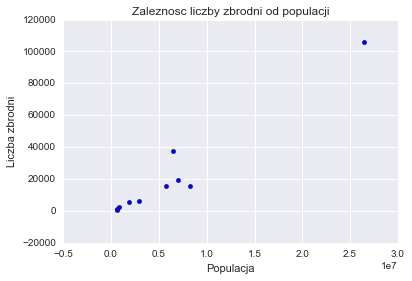

0.969156540491
0.94291475945
Zatem jest zalezność


In [20]:
plt.scatter(list(X_test1[:,0]),list(y_test1))
plt.xlabel('Populacja')
plt.ylabel('Liczba zbrodni')
plt.title('Zaleznosc liczby zbrodni od populacji')
plt.legend()
plt.show()
print mdl1.score(X_train1,y_train1)
print mdl1.score(X_test1,y_test1)
print "Zatem jest zalezność"

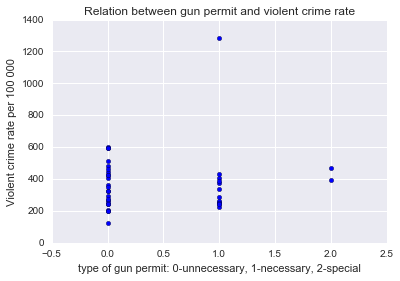

0.0090059104575
-0.366347961263
Czyli nie ma zależności


In [21]:
plt.scatter(list(X_train2[:,0]),list(y_train2))
plt.xlabel('type of gun permit: 0-unnecessary, 1-necessary, 2-special')
plt.ylabel('Violent crime rate per 100 000')
plt.title('Relation between gun permit and violent crime rate')
plt.legend()
plt.show()
print mdl2.score(X_train2,y_train2)
print mdl2.score(X_test2,y_test2)
print "Czyli nie ma zależności"

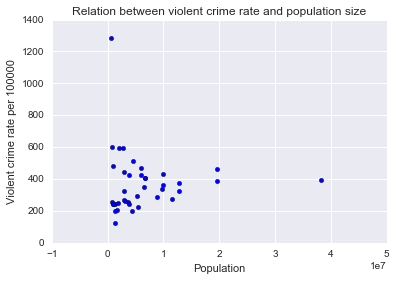

4.06537699627e-06
-0.509830133196
Nie widać zaleznosci


In [22]:
plt.scatter(list(X_train3[:,0]),list(y_train3))
plt.xlabel('Population')
plt.ylabel('Violent crime rate per 100000')
plt.title('Relation between violent crime rate and population size')
plt.legend()
plt.show()
print mdl3.score(X_train3,y_train3)
print mdl3.score(X_test3,y_test3)
print "Nie widać zaleznosci"

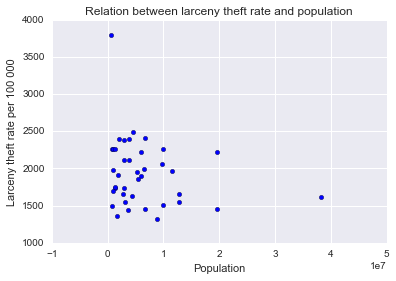

0.0493176366619
-0.409395132479
 Nie ma zaleznosci


In [23]:
plt.scatter(list(X_train4[:,0]),list(y_train4))
plt.xlabel('Population')
plt.ylabel('Larceny theft rate per 100 000')
plt.title('Relation between larceny theft rate and population')
plt.legend()
plt.show()
print mdl4.score(X_train4,y_train4)
print mdl4.score(X_test4,y_test4)
print " Nie ma zaleznosci"

In [24]:
dfTx13.head()



,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Rape
0,Abernathy,2 821,0,0,0,0,12,12,0,0,1,0
1,Abilene,119 401,477,1,125,314,4 769,1 055,3 460,254,16,37
2,Addison,15 961,51,1,11,35,784,129,593,62,1,4
3,Alamo,18 876,164,0,27,126,1 336,203,1 052,81,1,11
4,Alamo Heights,7 443,9,0,2,5,235,36,194,5,0,2


In [25]:
#rozwazania dotyczace Teksasu w latach 2013 i 2014 (dfTx13 i dfTx14)
t13 = np.array(dfTx13)
for i in xrange(604):
    t13[i,1] = t13[i,1].replace(" ", "")
    t13[i,6] = t13[i,6].replace(" ", "")

    
print "MODEL 5: Population and Property crime"   
X_train5 = t13[1:400,1].reshape(399,1)
y_train5 = t13[1:400,6].reshape(399,1)
X_test5 = t13[401:,1].reshape(203,1)
y_test5 = t13[401:,6].reshape(203,1)
mdl5 = LinearRegression().fit(X_train5,y_train5)
mdl5.predict(X_test5)

print "Wynik dla zbioru trenującego:"
print mdl5.score(X_train5,y_train5)
print "Wynik dla danych testowych:"
print mdl5.score(X_test5,y_test5)

print 

print "MODEL 6: Murder and nonnegligent manslaughter and Rape"
X_train6 = t13[1:400,3].reshape(399,1)
y_train6 = t13[1:400,11].reshape(399,1)
X_test6 = t13[401:,3].reshape(203,1)
y_test6 = t13[401:,11].reshape(203,1)
mdl6 = LinearRegression().fit(X_train6,y_train6)
mdl6.predict(X_test6)
print "Wynik dla zbioru trenującego:"
print mdl6.score(X_train6,y_train6)
print "Wynik dla danych testowych:"
print mdl6.score(X_test6,y_test6)

MODEL 5: Population and Property crime
Wynik dla zbioru trenującego:
0.971308324014
Wynik dla danych testowych:
0.948736877894

MODEL 6: Murder and nonnegligent manslaughter and Rape
Wynik dla zbioru trenującego:
0.771155434948
Wynik dla danych testowych:
0.599751291892


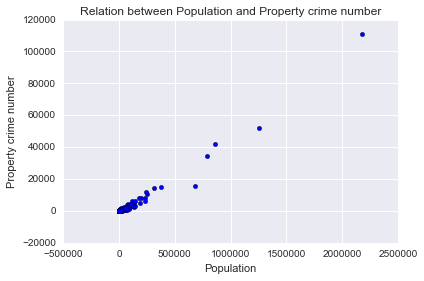

0.971308324014
0.948736877894
W końcu jest zależność :)


In [26]:
plt.scatter(list(X_train5[:,0]),list(y_train5))
plt.xlabel('Population')
plt.ylabel('Property crime number')
plt.title('Relation between Population and Property crime number')
plt.legend()
plt.show()
print mdl5.score(X_train5,y_train5)
print mdl5.score(X_test5,y_test5)
print "W końcu jest zależność :)"

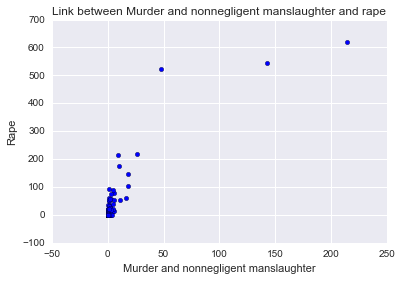

0.771155434948
0.599751291892
Jest slaba zaleznosc :| 


In [27]:
plt.scatter(list(X_train6[:,0]),list(y_train6))
plt.xlabel('Murder and nonnegligent manslaughter')
plt.ylabel('Rape')
plt.title('Link between Murder and nonnegligent manslaughter and rape')
plt.legend()
plt.show()
print mdl6.score(X_train6,y_train6)
print mdl6.score(X_test6,y_test6)
print "Jest slaba zaleznosc :| "

In [28]:
import csv 

def prepare_data(name, isMax):
    with open(name, 'rb') as f:
        reader = csv.reader(f)
        a=True
        Head=[]
        Return_Table=[]
        for row in reader:
            row_table=row[0].split(";")
            tuple_table=[]
            if a:
                Head=row[0].split(";")
                a=False
                continue
            for i in xrange(2,19):
                tuple_table.append((int(row_table[i].replace(" ","")),Head[i]))
            if isMax:
                tuple_table.sort(reverse=True)
            else:
                tuple_table.sort()
            Return_Table.append((row_table[0], tuple_table[:4]))
            
        return Return_Table
    
def create_chart(Ret1,Ret2,isMax):
    
    for i in xrange(0,17):
        if (Ret1[i][1][3][0]==0 and Ret1[i][1][2][0]==0 and Ret1[i][1][1][0]==0 and Ret1[i][1][0][0]==0 
        and Ret2[i][1][3][0]==0 and Ret2[i][1][2][0]==0 and Ret2[i][1][1][0]==0 and Ret2[i][1][0][0]==0):
            return
        f, (ax1,ax2) = plt.subplots(1,2, sharey=False)
        objects=(Ret1[i][1][3][1],Ret1[i][1][2][1],Ret1[i][1][1][1],Ret1[i][1][0][1])
        y_pos = np.arange(len(objects))
        quantity = (Ret1[i][1][3][0],Ret1[i][1][2][0],Ret1[i][1][1][0],Ret1[i][1][0][0])

        plt.tight_layout(w_pad=5)

        ax1.barh(y_pos, quantity, align='center', alpha=1)
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels(objects)
        ax1.set_xlabel("Number of victims")
        ax1.set_title('2013'+" "+Ret1[i][0])

        objects=(Ret2[i][1][3][1],Ret2[i][1][2][1],Ret2[i][1][1][1],Ret2[i][1][0][1])
        y_pos = np.arange(len(objects))
        quantity = (Ret2[i][1][3][0],Ret2[i][1][2][0],Ret2[i][1][1][0],Ret2[i][1][0][0])

        ax2.barh(y_pos, quantity, align='center', alpha=1)
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(objects)
        ax2.set_xlabel("Number of victims")
        ax2.set_title('2014'+" "+Ret2[i][0])

        plt.show()
            
Ret1=prepare_data('Rel2013.csv',True)
Ret2=prepare_data('Rel2014.csv',True)

print "The most frequent victims of murders in 2013-2014 and crime as a result of which there has been death"
create_chart(Ret1,Ret2,True)

            
Ret1=prepare_data('Rel2013.csv',False)
Ret2=prepare_data('Rel2014.csv',False)

print "Rarest victims of murders in 2013-2014 and crime as a result of which there has been death (non-zero)"
create_chart(Ret1,Ret2,False)


IndexError: list index out of range

In [161]:
dfNY13 = dfNY13.dropna()
dfNY13 = dfNY13.reset_index(drop=True)
kolumnyNY13 =dfNY13.columns.values[1:]

for col in kolumnyNY13:
    for i in range(len(dfNY13)):
        if type(dfNY13.loc[i, col]) is str:
            dfNY13.loc[i, col] = dfNY13.loc[i, col].replace(" ", "").replace(",", ".")
        dfNY13.loc[i, col] = float(dfNY13.loc[i, col])
        
    dfNY13[[col]] = dfNY13[[col]].astype(float)

In [164]:
dfNY14 = dfNY14.dropna()
dfNY14 = dfNY14.reset_index(drop=True)
kolumnyNY14 =dfNY14.columns.values[1:]

for col in kolumnyNY14:
    for i in range(len(dfNY14)):
        if type(dfNY14.loc[i, col]) is str:
            dfNY14.loc[i, col] = dfNY14.loc[i, col].replace(" ", "").replace(",", ".")
        dfNY14.loc[i, col] = float(dfNY14.loc[i, col])
        
    dfNY14[[col]] = dfNY14[[col]].astype(float)

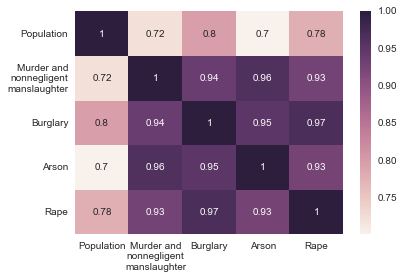

In [177]:
sns.heatmap(dfNY13.loc[:,['Population','Murder and\nnonnegligent\nmanslaughter','Burglary','Arson','Rape']].corr(), annot=True)

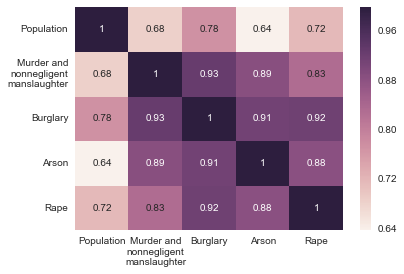

In [178]:
sns.heatmap(dfNY14.loc[:,['Population','Murder and\nnonnegligent\nmanslaughter','Burglary','Arson','Rape']].corr(), annot=True)

In [ ]:
#Na podstawie danych z 2013 i 2014 możemy powiedzieć, że najwięcej morderstw jest popełnianych na niezbyt bliskich znajomych. 
#Okoliczności towarzyszące tym morderstwom mają związek z konkretną osobą (gwałt, prostytucja, narkotyki, hazard czy 
#niezwrócenie pożyczonego samochodu). Wśród tych pojawia się także podpalenie, co może być powodowane bardzo różnymi powodami 
#wzniecania pożaru jak np. wyłudzanie odszkodowania. 

#Osobno można spojrzeć na trójkąty miłosne i dzieci zabijane przez niańki. 
#Zarówno w jednym jak i w drugim przypadku giną znajomi czy dzieci znajomych, a liczba ich wcale nie jest tak mała. 
#W wypadku dzieci nie giną przypadkowe osoby, a na drugim miejscu, co do częstości (po znajomych) są synowie. 
#W kwestii miłości pojawiają się już losowe ofiary, ale jeśli ginie ktoś z tego związku to częściej jest to dziewczyna czy żona. 
#Drugą najliczniejszą grupą ofiar są przypadkowi ludzie, co ma miejsce przede wszystkim w trakcie rozbojów, włamań i kradzieży. 
#Najrzadziej zabijani są pracownicy i pracodawcy, co dość dobrze świadczy o USA. 
#Biorąc pod uwagę wszystkie rodzaje morderstw stosunkowo rzadko morderstwo jest popełniane pomiędzy rodzeństwem. 

#Na podstawie macierzy korelacji wnioskujemy, że w większe miasta stały się bardziej bezpieczne w stosunku do mniejszych,
#ponieważ współczynnik korelacji populacji w stosunku do różnych rodzajów przestępstw.
#Widać również, że nie ma dużej zależności między populacją a liczbą podpaleń (współczynniki korelacji wynoszą odpowiednio .7 i .64)